# 3S Exomiser performance evaluation

This notebook plots comparison of Exomiser performance with or without 3S module. The performance is evaluated on ~500 cases.


In [2]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import seaborn as sns

from curation import group_pathomechanism_for_threes_evaluation, load_threes_ranks_table, plot_multicolor

sns.set_style('whitegrid')
plt.rcParams.update({'axes.labelsize':'large', 'axes.labelweight':'bold'})

#data_dir = "/Users/danisd/data/threes-simulations"
data_dir = "/home/ielis/data/threes-simulations"

There were multiple rows of evaluation:
- [First](#20190711) - setting up the baseline
- [Second](#20190812) - improving rank of variants which are scored well using SPLICING scorer but for other reasons are not ranked well
- [Third](#20190813) - aimed to improve performance of variants located deep in intron which usually lead to activation of the CSS
- [Cases where the gene is not found at all](#Cases-where-the-gene-is-not-found-at-all) - the cases where the rank is `-1` either when using or when *not* using the SPLICING scorer

## 20190711

## Read simulations output

Read the `ranks.tsv` file.

### Melt the rows with multiple `PATHOMECHANISM` entries
Some lines represent cases where variants with multiple pathomechanisms were present. 

E.g.: `PMID:24704046-Mattioli-2014-FANCA-proband_II-1	1	1	splicing|3ss|disrupted;splicing|SRE`

We split such line into two lines where value from `PATHOMECHANISM` column is distributed into two rows. Other values stay the same.

### Remove lines representing non-splicing pathomechanisms

Lines with pathomechanism such as `coding|missense` are removed.

In [3]:
version = "20190711"
FPATH = "{0}/{1}-output-checked/{1}-ranks.tsv".format(data_dir, version)
df20190711 = load_threes_ranks_table(FPATH)

ho = np.sort(df20190711['PATHOGRP'].unique())
df20190711.head()

,CASE,WITH_SPLICING,WITHOUT_SPLICING,PATHOMECHANISM,PATHOGRP
0,PMID:11828341-Ishii-2002-GLA-proband_1,-1,-1,splicing|SRE|ESS|binding|decreased,SRE
1,PMID:28679633-Ito-2017-MYBPC3-VARIANT407-5C>T,90,10,splicing|3ss|disrupted,3ss|disrupted
2,PMID:23606313-Fan-2013-TAZ-proband,1,1,splicing|5css|activated,5css|activated
3,PMID:8878424-Jin-1996-ITGB3-RS,1,1,splicing|5ss|disrupted,5ss|disrupted
4,PMID:10330348-Teraoka-1999-ATM-AT51LA,1,1,splicing|5ss|disrupted,5ss|disrupted


## Which pathomechanisms are being discovered?

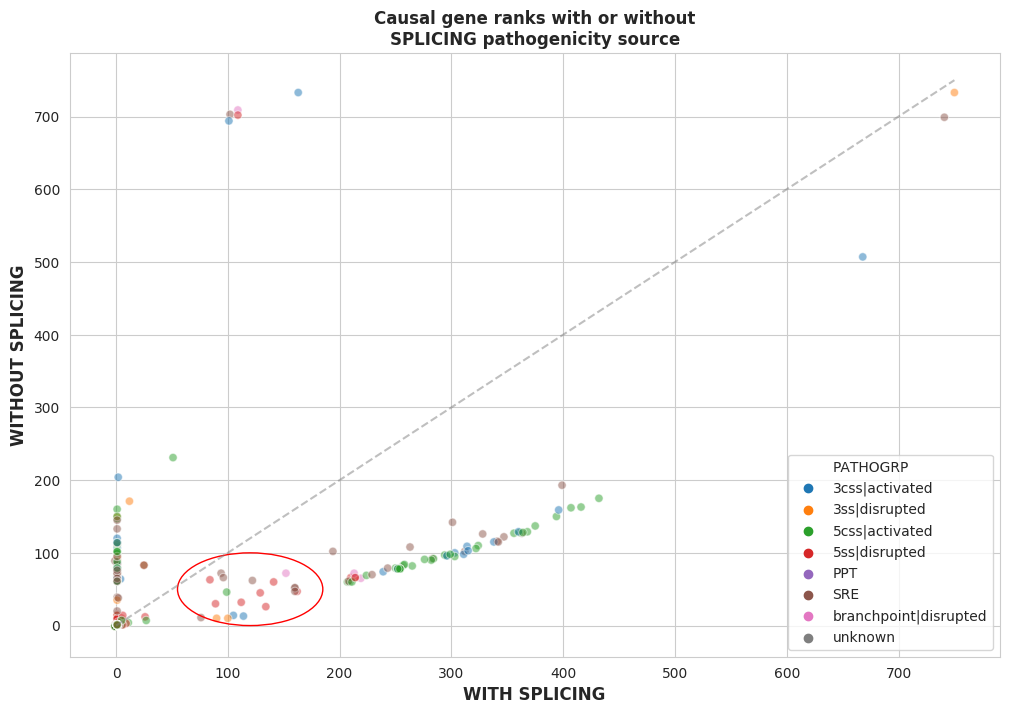

In [4]:
fig, ax = plt.subplots(figsize=(12, 8), dpi=100)
plot_multicolor(df20190711.WITH_SPLICING, df20190711.WITHOUT_SPLICING, df20190711.PATHOGRP, ho, ax=ax)

e20190711 = Ellipse((120, 50), width=130, height=100, facecolor='none', edgecolor="red")
k = ax.add_patch(e20190711)

**Interpretation**

The red ellipse denotes cases where the SPLICING score was more like a burden than like an asset. These cases were looked at and fixed, whenever it was possible.

Some cases lacked a good phenotype terms resulting in low Phenotype Score. The other cases lacked the second variant required for correct identification of COMPHET inheritance.

After fixing these issues, the analysis was run again producing the dataset denoted as *20190812*. The new dataset is analyzed below.

## 20190812

The second round of evaluation on adjusted phenopackets.

### Cases where Exomiser performed better _without_ SPLICING score

In [5]:
version = "20190812"
where_to_save = "{0}/{1}-output-checked/{1}-to_improve.tsv".format(data_dir, version)
df20190711.loc[(df20190711.WITH_SPLICING > 50) & (df20190711.WITH_SPLICING < 200), :].to_csv(where_to_save, sep="\t")

Analysis was done here, Exomiser was run again, either using or not using the `SPLICING` score. Results were written to `20190812-ranks.tsv` file.

In [6]:
FPATH = "{0}/{1}-output-checked/{1}-ranks.tsv".format(data_dir, version)
df20190812 = load_threes_ranks_table(FPATH)

ho = np.sort(df20190812['PATHOGRP'].unique())
df20190812.head()

,CASE,WITH_SPLICING,WITHOUT_SPLICING,PATHOMECHANISM,PATHOGRP
0,PMID:23239986-Wappenschmidt-2012-BRCA-09_3943-001,-1,-1,splicing|5ss|disrupted,5ss|disrupted
1,PMID:24342716-Kirwin-2014-TAZ-4,1,1,splicing|5ss|disrupted,5ss|disrupted
2,PMID:28507310-Pousada-2017-BMPR2-VARIANT412C>G,1,1,splicing|5css|activated,5css|activated
3,PMID:28679633-Ito-2017-LMNA-VARIANT1146C>T,1,79,splicing|5css|activated,5css|activated
4,PMID:18511318-Fukao-2008-ACAT1-GK43,27,7,splicing|5css|activated,5css|activated


## Which pathomechanisms are being discovered?

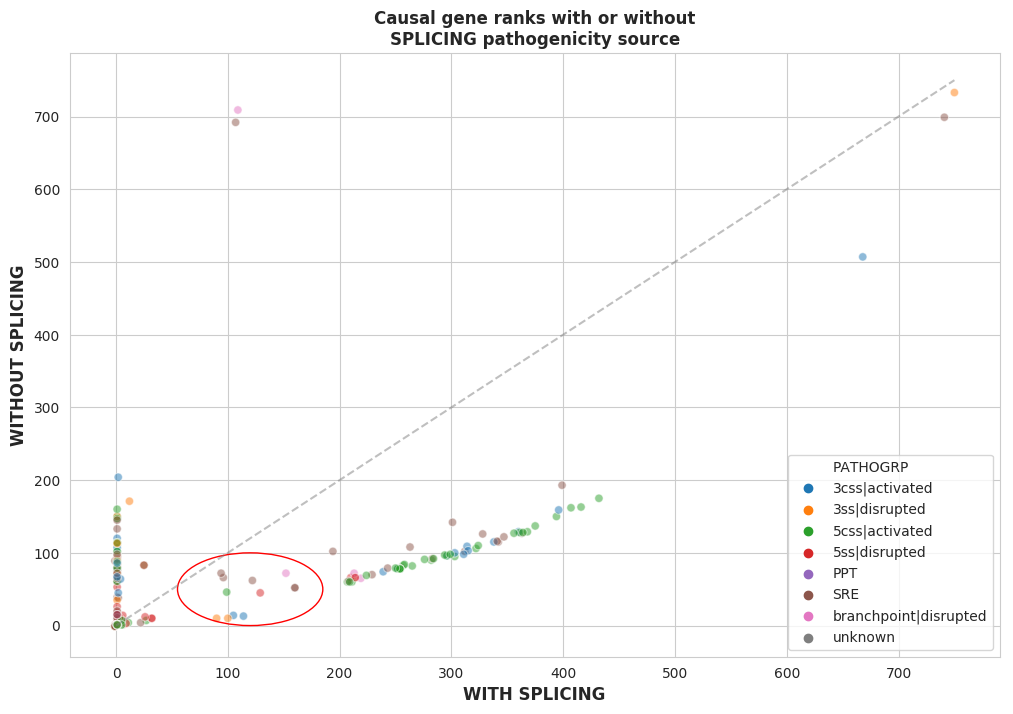

In [7]:
fig, ax = plt.subplots(figsize=(12, 8), dpi=100)
plot_multicolor(df20190812.WITH_SPLICING, df20190812.WITHOUT_SPLICING, df20190812.PATHOGRP, ho, ax=ax)

e20190711 = Ellipse((120, 50), width=130, height=100, facecolor='none', edgecolor="red")
k = ax.add_patch(e20190711)

## Comparison of 20190711 and 20190812


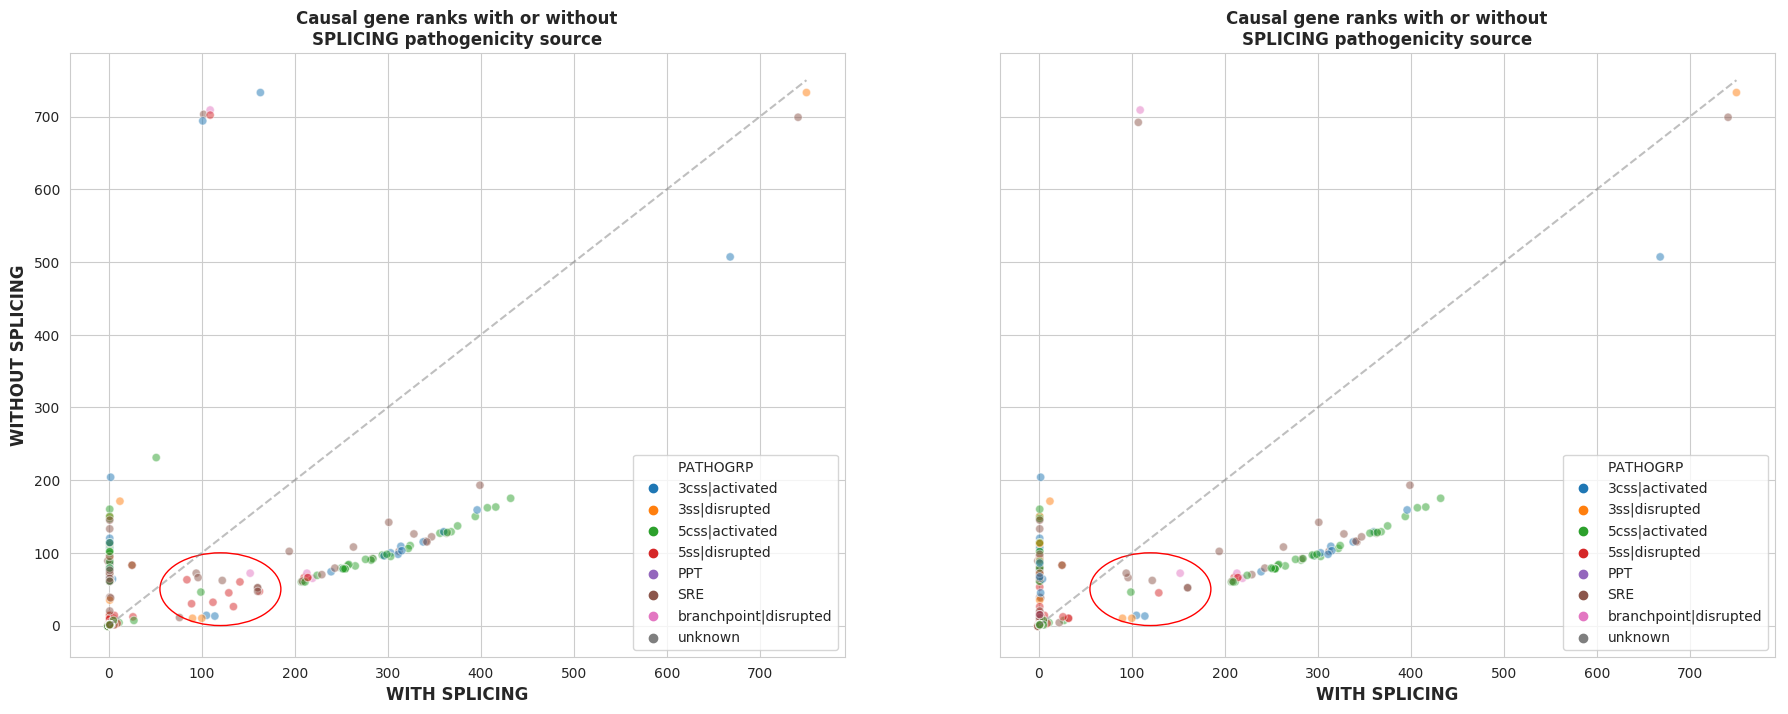

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(22, 8), dpi=100, sharey=True)
plot_multicolor(df20190711.WITH_SPLICING, df20190711.WITHOUT_SPLICING, df20190711.PATHOGRP, ho, ax=ax[0])
plot_multicolor(df20190812.WITH_SPLICING, df20190812.WITHOUT_SPLICING, df20190812.PATHOGRP, ho, ax=ax[1])

e20190711 = Ellipse((120, 50), width=130, height=100, facecolor='none', edgecolor="red")
ax[0].add_patch(e20190711);

# the same ellipse but for different plot
e20190812 = Ellipse((120, 50), width=130, height=100, facecolor='none', edgecolor="red")
ax[1].add_patch(e20190812);

**Interpretation**

There are more cases under the line and between `50 <--> 200` on *WITH SPLICING* axis on the left plot. Adding the 2nd variant in COMPHET cases, and addidtional HP terms in other cases obviously helped.

Most of the cases from the ellipse has moved into rank ~1, which is the expected behaviour. The rest of the cases cannot be improved at the moment.

## 20190813

Take a look at the cases further up along the `WITH SPLICING` axis (denoted as <span style="color:blue">blue ellipse</span>).

We will denote this dataset as **20190813**.

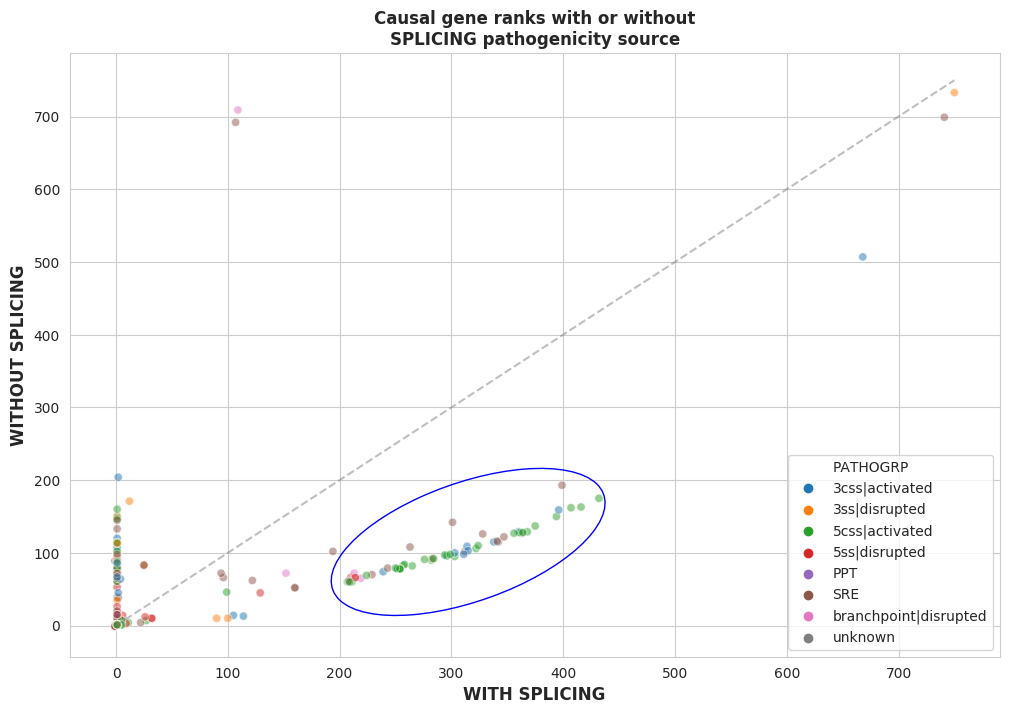

In [9]:
fig, ax = plt.subplots(figsize=(12, 8), dpi=100)
plot_multicolor(df20190812.WITH_SPLICING, df20190812.WITHOUT_SPLICING, df20190812.PATHOGRP, ho, ax=ax)

e20190711 = Ellipse((315, 115), width=280, height=150, angle=35, facecolor='none', edgecolor="blue")
k = ax.add_patch(e20190711)

## Cases where Exomiser performed better _without_ SPLICING score

In [10]:
version = "20190813"
os.makedirs("{0}/{1}-output-checked".format(data_dir, version), exist_ok=True)

where_to_save = "{0}/{1}-output-checked/{1}-to_improve.tsv".format(data_dir, version)
df20190812.loc[(df20190812.WITH_SPLICING > 200) & (df20190812.WITH_SPLICING < 450), :].to_csv(where_to_save, sep="\t", index=False)

Exomiser was run again, and intronic variants up to 500bp away from exon/intron boundary were evaluated. As previously, each case was analyzed either using or not using the `SPLICING` score. Results were written to `20190813-ranks.tsv` file.

In [11]:
FPATH = "{0}/{1}-output-checked/{1}-ranks.tsv".format(data_dir, version)
df20190813 = load_threes_ranks_table(FPATH)

ho = np.sort(df20190813['PATHOGRP'].unique())
df20190813.head()

,CASE,WITH_SPLICING,WITHOUT_SPLICING,PATHOMECHANISM,PATHOGRP
0,PMID:23239986-Wappenschmidt-2012-BRCA-09_3943-001,-1,-1,splicing|5ss|disrupted,5ss|disrupted
1,PMID:24342716-Kirwin-2014-TAZ-4,1,1,splicing|5ss|disrupted,5ss|disrupted
2,PMID:28507310-Pousada-2017-BMPR2-VARIANT412C>G,1,1,splicing|5css|activated,5css|activated
3,PMID:28679633-Ito-2017-LMNA-VARIANT1146C>T,268,79,splicing|5css|activated,5css|activated
4,PMID:18511318-Fukao-2008-ACAT1-GK43,79,7,splicing|5css|activated,5css|activated


## Which pathomechanisms are being discovered?

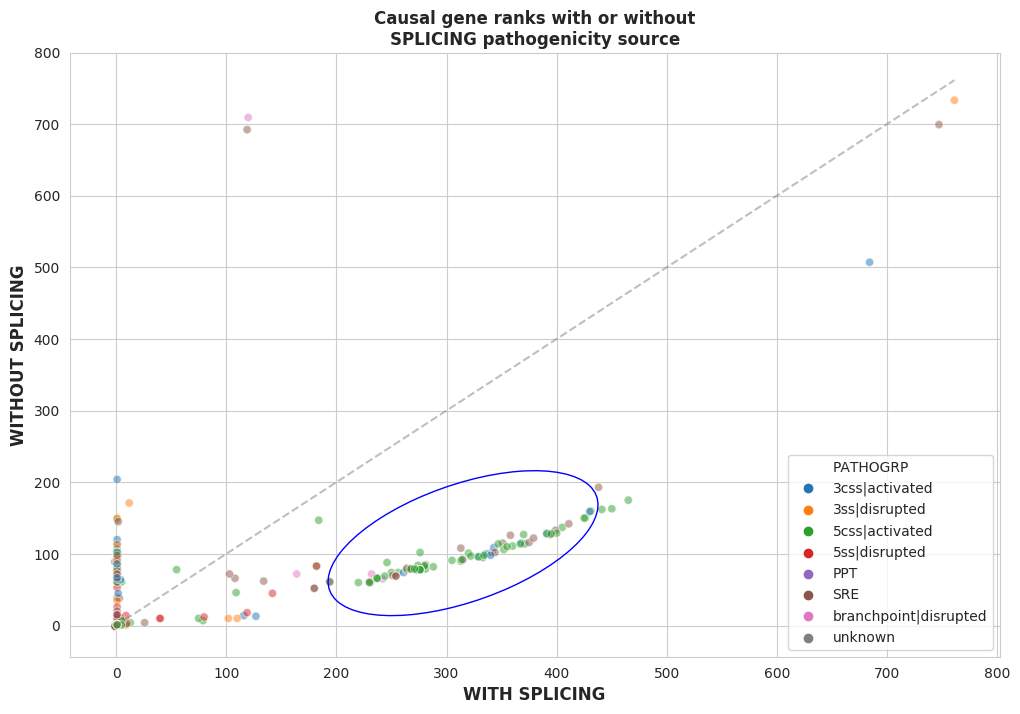

In [12]:
fig, ax = plt.subplots(figsize=(12, 8), dpi=100)
plot_multicolor(df20190813.WITH_SPLICING, df20190813.WITHOUT_SPLICING, df20190813.PATHOGRP, ho, ax=ax)

e20190813 = Ellipse((315, 115), width=280, height=150, angle=35, facecolor='none', edgecolor="blue")
k = ax.add_patch(e20190813)

## Comparison of 20190812 and 20190813


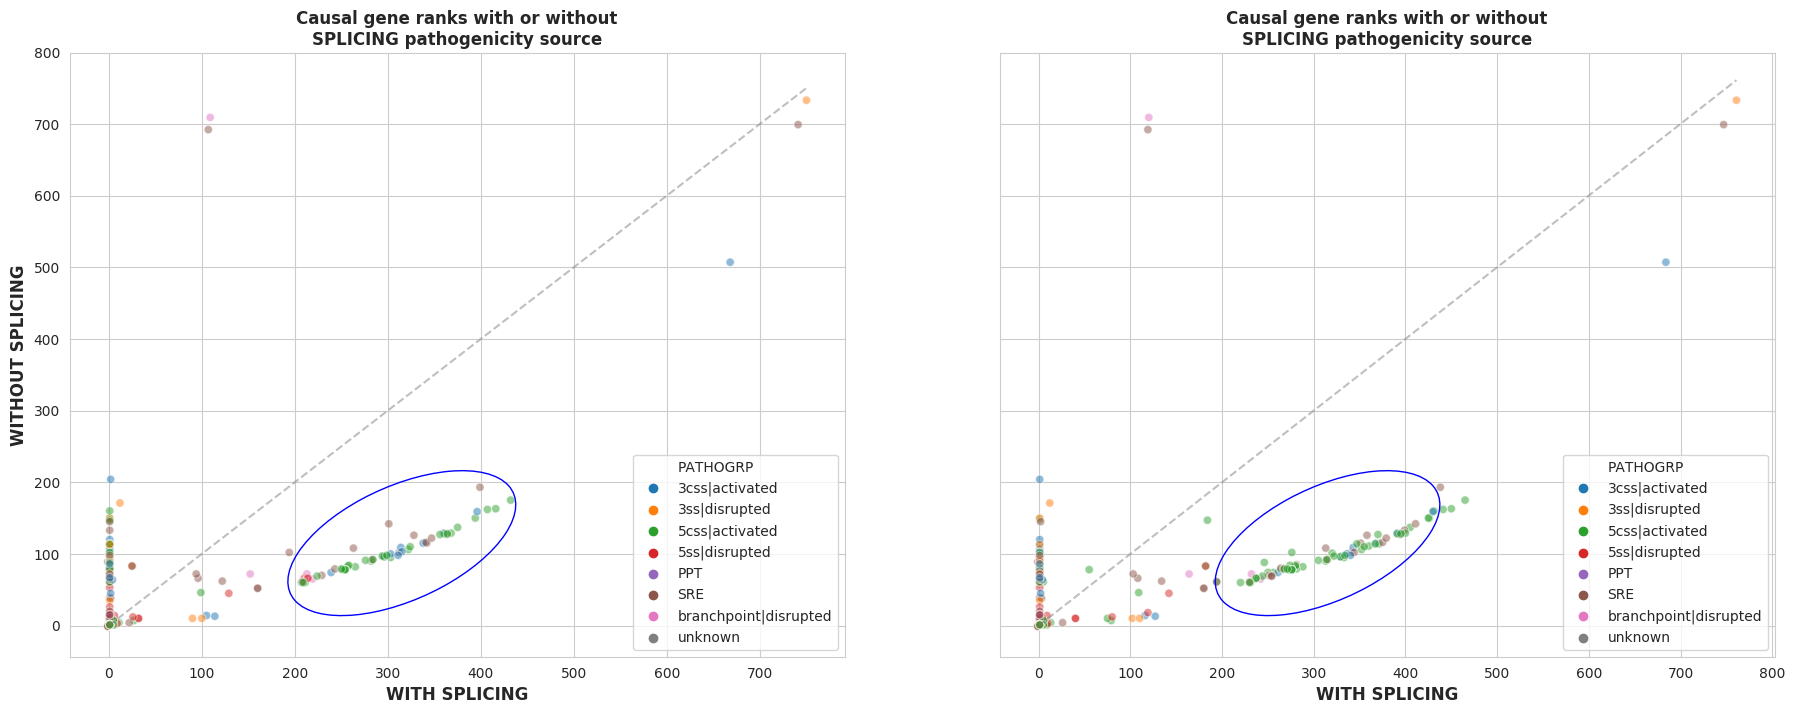

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(22, 8), dpi=100, sharey=True)
plot_multicolor(df20190812.WITH_SPLICING, df20190812.WITHOUT_SPLICING, df20190812.PATHOGRP, ho, ax=ax[0])
plot_multicolor(df20190813.WITH_SPLICING, df20190813.WITHOUT_SPLICING, df20190813.PATHOGRP, ho, ax=ax[1])

e20190813 = Ellipse((315, 115), width=280, height=150, angle=35, facecolor='none', edgecolor="blue")
ax[0].add_patch(e20190813);

# the same ellipse but for different plot
e20190813 = Ellipse((315, 115), width=280, height=150, angle=35, facecolor='none', edgecolor="blue")
ax[1].add_patch(e20190813);

## Cases where the gene is not found at all

Some cases have rank `-1` what means that the causal gene has not been identified at all.

There are three cases:
1. causal gene was not identified when using the SPLICING score
2. causal gene was not identified when *not* using the SPLICING score
3. causal gene was identified *neither* with the SPLICING *nor* without the score

### 1) causal gene not identified when using the SPLICING score

This is the most interesting group, because the code is doing exactly the opposite of what it should be doing.

In [14]:
# the latest data format
df20190813.loc[(df20190813.WITH_SPLICING == -1) & (df20190813.WITHOUT_SPLICING != -1), :]

,CASE,WITH_SPLICING,WITHOUT_SPLICING,PATHOMECHANISM,PATHOGRP
29,PMID:29762696-Bruun-2018-ELP1-FD_patients,-1,1,splicing|5ss|disrupted,5ss|disrupted
483,PMID:20157015-Yu-Wai-Man-2010-OPA1-FR-5,-1,89,splicing|SRE,SRE


From some reason, the causal variant from case `Bruun 2018` is being filtered out. The variant is known, it is represented in the dbSNP database ([rs111033171](https://www.snpedia.com/index.php/Rs111033171)), and also in ClinVar as *pathogenic*. The SPLICING score is `0.7962`, the variant has, however, quite high `AF=0.11872201`.

### 2) causal gene identified only when using the SPLICING score

This group is empty. 

There are no cases, where the causal gene was identified only when using SPLICING score.

In [15]:
df20190813.loc[(df20190813.WITH_SPLICING != -1) & (df20190813.WITHOUT_SPLICING == -1), :]

,CASE,WITH_SPLICING,WITHOUT_SPLICING,PATHOMECHANISM,PATHOGRP


### 3) causal gene was identified neither with the SPLICING nor without the score

We need to check why these variants are not being identified. Are they being filtered out?

In [16]:
df20190813.loc[(df20190813.WITH_SPLICING == -1) & (df20190813.WITHOUT_SPLICING == -1), :]

,CASE,WITH_SPLICING,WITHOUT_SPLICING,PATHOMECHANISM,PATHOGRP
0,PMID:23239986-Wappenschmidt-2012-BRCA-09_3943-001,-1,-1,splicing|5ss|disrupted,5ss|disrupted
78,PMID:22753590-Anczuków-2012-BRCA2-13_women,-1,-1,splicing|5css|activated,5css|activated
80,PMID:21673748-Théry-2011-BRCA1-c.557C>A,-1,-1,splicing|SRE,SRE
86,PMID:25183659-Nozu-2014-COL4A1-128,-1,-1,splicing|3ss|disrupted,3ss|disrupted
87,PMID:10571956-Vuillaumier-Barrot-1999-PMM-patient,-1,-1,splicing|SRE,SRE
94,PMID:25312915-Kergourlay-2014-DYSF-VARIANT565C>G,-1,-1,splicing|5css|activated,5css|activated
111,PMID:14517959-Krämer-2003-BEST1-#011378,-1,-1,splicing|SRE,SRE
119,PMID:19101985-Byrne-2009-ABCB11-VARIANT3084A>G,-1,-1,splicing|SRE,SRE
194,PMID:22156576-Pasutto-2012-ASB10-no-id,-1,-1,splicing|SRE,SRE
195,PMID:17043057-Suphapeetiporn-2006-PTEN-48-year...,-1,-1,splicing|SRE|ESE,SRE


## TODO - do analysis

- *long shot* - test how SpliceAI works with our curated variants

## ASHG poster results

The results being presented on ASHG poster are the results release *20190812* (data frame `df20190812`).

Let's create a bar plot:
- *y* - % of cases with disease variant as top hit, top 5, or..
- *x* - classes of variants or pathomechanisms - `All`, `splicing|5css|activated`, etc..

In [17]:
x_vals = ['5ss|disrupted', '5css|activated', '3ss|disrupted', '3css|activated', 'SRE']

ashg = df20190812
ashg.head()

,CASE,WITH_SPLICING,WITHOUT_SPLICING,PATHOMECHANISM,PATHOGRP
0,PMID:23239986-Wappenschmidt-2012-BRCA-09_3943-001,-1,-1,splicing|5ss|disrupted,5ss|disrupted
1,PMID:24342716-Kirwin-2014-TAZ-4,1,1,splicing|5ss|disrupted,5ss|disrupted
2,PMID:28507310-Pousada-2017-BMPR2-VARIANT412C>G,1,1,splicing|5css|activated,5css|activated
3,PMID:28679633-Ito-2017-LMNA-VARIANT1146C>T,1,79,splicing|5css|activated,5css|activated
4,PMID:18511318-Fukao-2008-ACAT1-GK43,27,7,splicing|5css|activated,5css|activated


- We have **564** cases
- The data looks well (after exporting the `ashg` dataframe to CSV and manually inspecting the content in LibreOffice Calc)


In [18]:
len(ashg.CASE.unique())

564

### Plot comparison w/ and w/o Splicing scorer

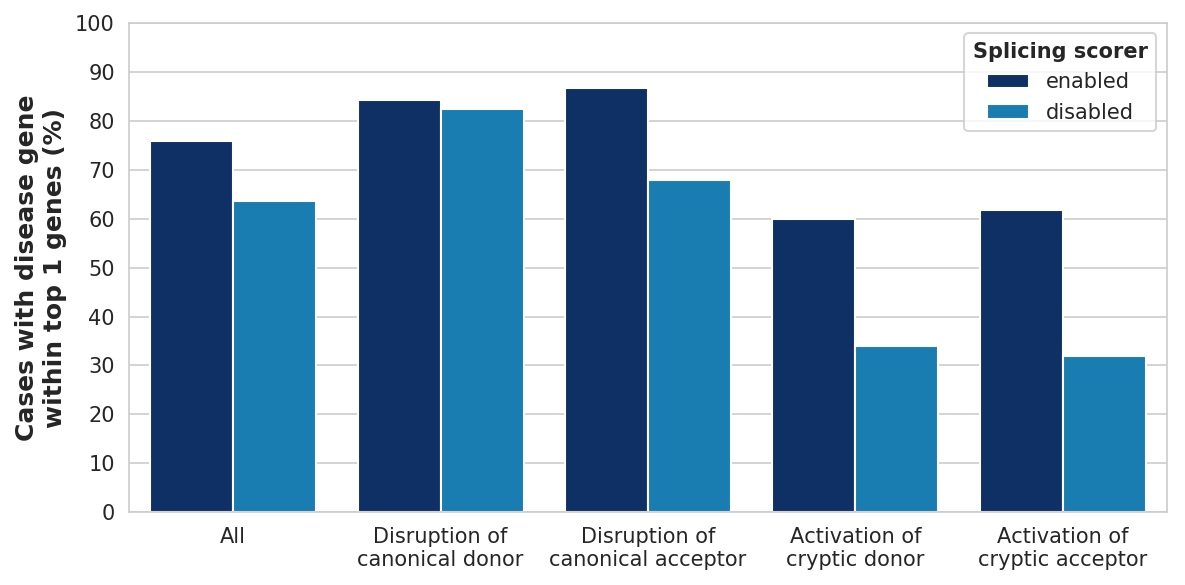

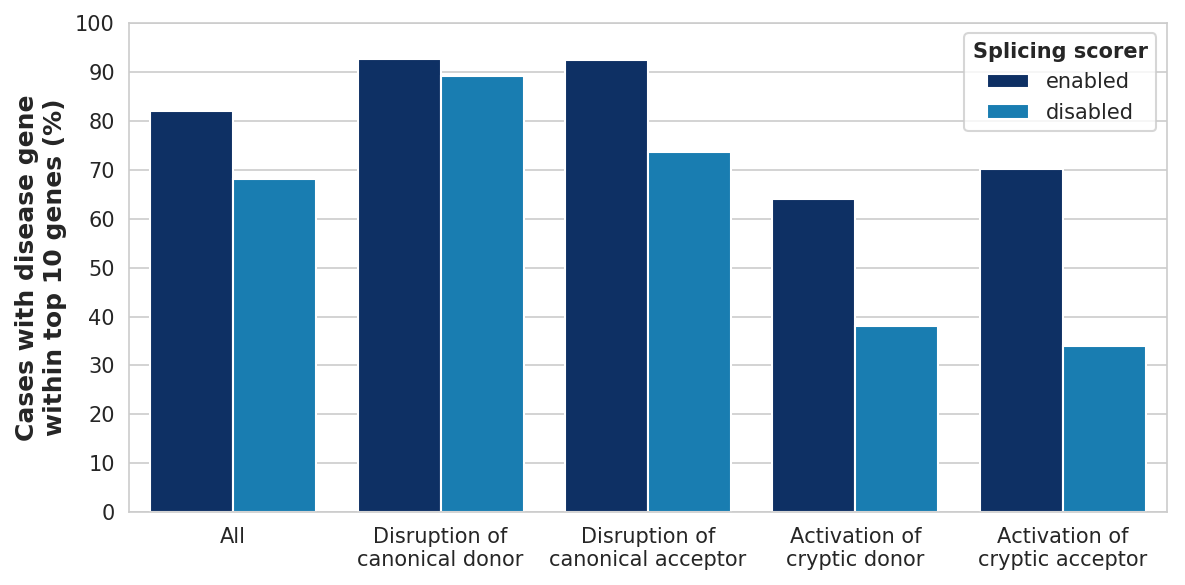

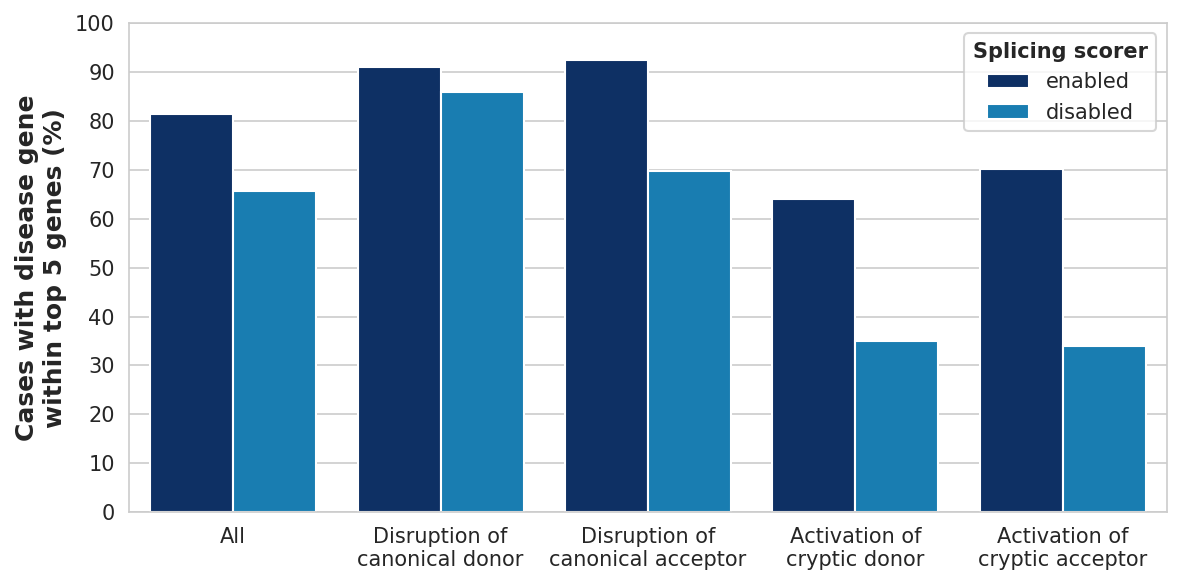

In [21]:
domains = ('all', '5ss|disrupted', '3ss|disrupted', '5css|activated', '3css|activated')

for threshold in (1, 10, 5):
    domain_results = dict()

    #### ----------    COUNT WHAT IS INTERESTING ACROSS ALL DOMAINS    ---------- ####
    for domain in domains:
        if domain == 'all':
            domain_mask = pd.Series(data=np.full(ashg.shape[0], True, dtype=bool))
        else:
            domain_mask = ashg.PATHOGRP == domain

        domain_data = ashg.loc[domain_mask]
        labels = ('WITH_SPLICING', 'WITHOUT_SPLICING')
        ranks = domain_data.groupby('CASE')[labels].apply(lambda df: df.iloc[0, :]).reset_index().melt(id_vars='CASE', var_name='experiment', value_name='ranking').rename(columns={'CASE':'case_id'})

        # define items we want to count
        success_mask = (ranks.ranking <= threshold) & (ranks.ranking != 0)
        results = {label: len(ranks.loc[(success_mask) & (ranks.experiment == label), :]) for label in labels}
        results['total'] = len(domain_data)
        domain_results[domain] = results

    # load results into data frame
    dr = pd.DataFrame(domain_results)
    dr = dr.T.reset_index().rename(columns={'index':'pathoGrp', 'WITH_SPLICING':'withSplicing', 'WITHOUT_SPLICING':'withoutSplicing'})
    # melt into long format
    dr = dr.melt(id_vars=('pathoGrp'), var_name='condition', value_name='ranking').sort_values(by=('pathoGrp')).reset_index(drop=True)

    # calculate percent of cases 
    def map_to_percent(df):
        total = df.loc[df['condition'] == 'total', 'ranking'].max()
        return df['ranking'] * 100/ total

    dr['rank_perc'] = dr.groupby('pathoGrp').apply(map_to_percent).droplevel(level=0)
    # remove rows where `condition == total`, since we are not intrested in these
    dr = dr.loc[dr.condition != 'total', :]

    #### ----------------------------    MAKE PLOT    ---------------------------- ####
    fig, ax = plt.subplots(figsize=(8, 4), dpi=150)
    #palette=['#2C2A29', '#A2AAAD']  # JAX black white
    palette = ['#002D72', '#0085CA']  # JAX blue colors
    sns.barplot(data=dr, x='pathoGrp', y='rank_perc', hue='condition', order=domains, ax=ax, palette=palette)
    ax.set(ylabel='Cases with disease gene\nwithin top {} genes (%)'.format(threshold), xlabel='',# xlabel='Pathomechanism group',
           yticks=range(0, 101, 10),
           xticklabels=['All', 'Disruption of\ncanonical donor', 'Disruption of\ncanonical acceptor', 'Activation of\ncryptic donor', 'Activation of\ncryptic acceptor'])
    
    lg = ax.legend()
    lg.set_title('Splicing scorer', prop={'weight':800})
    legend_texts = lg.texts
    legend_texts[0].set_text('enabled')
    legend_texts[1].set_text('disabled')

    fig.tight_layout()
    fig.savefig('img/comparison_strategies_{}.svg'.format(threshold))

In [20]:
dr

,pathoGrp,condition,ranking,rank_perc
0,3css|activated,withSplicing,33,70.212766
1,3css|activated,withoutSplicing,16,34.042553
3,3ss|disrupted,withSplicing,49,92.452830
4,3ss|disrupted,withoutSplicing,37,69.811321
6,5css|activated,withSplicing,64,64.000000
7,5css|activated,withoutSplicing,35,35.000000
9,5ss|disrupted,withSplicing,161,90.960452
10,5ss|disrupted,withoutSplicing,152,85.875706
12,all,withSplicing,475,81.475129
13,all,withoutSplicing,383,65.694683


> **Note:** there a few terms used in the code that creates the above plot:
> - **domain** - which variants are considered:
>   - all variants
>   - variants with `PATHOGRP=5ss|disrupted`, or `PATHOGRP=5css|activated`
>
> **success mask** - apply the mask to create subset of variants from the *domain*, where the pipeline was successful. E.g. the pipeline ranked the variant to position <5

In [ ]:
ashg